# Loading Data
We load the data from https://www.kaggle.com/datasnaek/youtube-new/data
After loading the data we have a dictionary of dataframes with the keys being the country abbreviation and the values being the associated dataframe of trending videos in that country. 

# Cleaning the data
The first thing we do is delete duplications of trending videos that trended for multiple days. After that we load the JSON file and create a new column in each dataframe which gives the name of the category which can be found from the category ID. Next we convert the trending date and publish time to dates. Finally we delete the columns we will not use. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib.pyplot as plt
import datetime as dt
import os
#print(os.listdir("../input"))

data_frames ={}
countries = ['CA', 'FR', 'GB', 'US', 'DE']
drop_columns = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for country in countries:
    fileName = '../input/' + country +'videos.csv'
    df = pd.read_csv(fileName, index_col='video_id')
    #Get rid of videos trending for more than 1 day. 
    df = df[~df.index.duplicated(keep='last')]
    categoryId_file = '../input/' + country +'_category_id.json'
    categories_dictionary={}
    with open(categoryId_file, 'r') as f:
        categories = json.load(f)
        for x in categories['items']:
            categories_dictionary[x['id']]=x['snippet']['title']
        categories_dictionary = {int(y): z for y,z in categories_dictionary.items()}
        df.insert(4, 'category_name','')
        df['category_name'] = df['category_id'].map(categories_dictionary)
        df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
        df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')
        df.drop(drop_columns, axis=1, inplace=True)
        data_frames[country]=df
        

data_frames['FR'].head()

,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
video_id,,,,,,,,,,,,,
nduL7G_gJoY,2017-11-14,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,Entertainment,2017-11-12 19:00:08,"fantome|""esprits""|""spiritisme""|""hanté""|""ouija""...",187654,9286,1381,2419.0,https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg,"Bonsoir à tous, \nJe tenais beaucoup à retourn..."
QmpWE_SODZA,2017-11-14,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,Entertainment,2017-11-13 17:30:01,"salut les terriens|""squeezie""|""jeux videos""|""i...",91051,1674,1903,701.0,https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg,"Dans Salut Les Terriens, Thierry Ardisson, reç..."
Wbbj4oZ-Wmo,2017-11-14,[Zap Télé] LA FIN DE L'INTELLIGENCE (13/11/17),Zap Télé,24,Entertainment,2017-11-13 11:08:25,"robot|""demain tous crétins""|""intelligence arti...",72519,689,23,362.0,https://i.ytimg.com/vi/Wbbj4oZ-Wmo/default.jpg,"Sophia fascine les journalistes, Jérémy Ferrar..."
exMNBvwCfRY,2017-11-14,LES PIRES DOUBLAGES FRANÇAIS,SQUEEZIE,23,Comedy,2017-11-10 18:25:25,"squeezie doublage|""squeezie batman""|""squeezie ...",3641421,218587,5809,12649.0,https://i.ytimg.com/vi/exMNBvwCfRY/default.jpg,"Quand la voix ne colle pas au perso, que la tr..."
8YEGqrtsxBc,2017-11-14,6 CRITIQUES OCT/NOV (Thor 3 / Carbone / Au Rev...,INTHEPANDA,1,Film & Animation,2017-11-12 12:59:45,"INTHEPANDA|""INTHEPANDA CRITIQUE""|""INTHEPANDA C...",102804,6306,179,421.0,https://i.ytimg.com/vi/8YEGqrtsxBc/default.jpg,S'abonner permet d'être coolos : http://bit.ly...


# Data Observations
Here we print out the total number of trending videos for each country. 

In [62]:
n_Rows = {}
for country in countries:
    n_Rows[country]=len(data_frames[country])
print(n_Rows)

{'CA': 18539, 'FR': 23471, 'GB': 2809, 'US': 5586, 'DE': 22820}


Let us plot the frequencies of the most popular video categories in each country. 

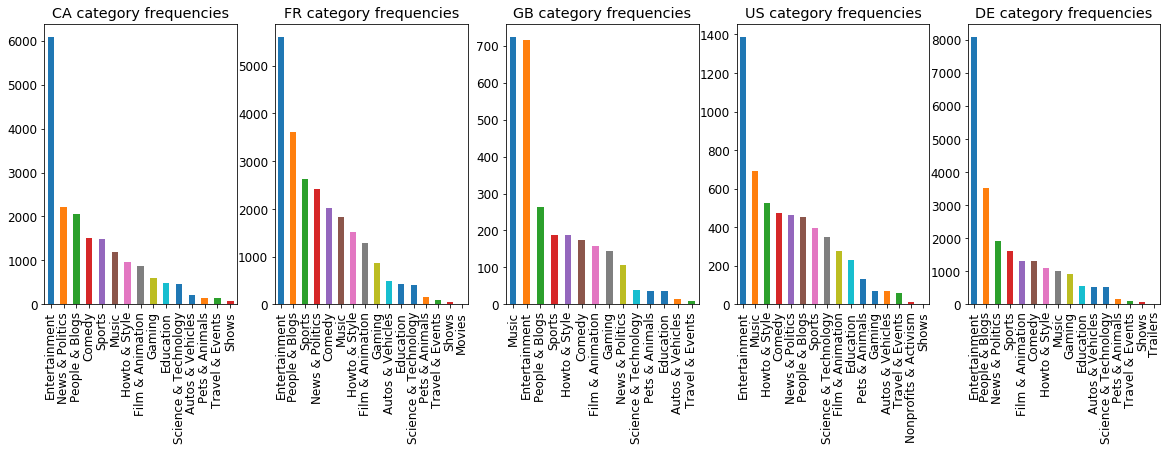

In [63]:
fig = plt.figure(figsize=(20,5))
count = 0

for country in countries:
    plt.subplot2grid((1,5),(0,count))
    data_frames[country]['category_name'].value_counts().plot(kind='bar')
    plt.title(country + ' category frequencies')
    count = count + 1

Notice that in every country except Great Britian the entertainment category is the most popular by a considerable margin. In Great Britian music is the the most popluar but entertainment is close. In non-english countries the music category is as prevelent for trending videos (recall that French is spoken in eastern Canada). 

Lets take a look at the most popular youtube channels across all 5 countries. 

Text(0.5,1,'Most Popular Tending Video Channels')

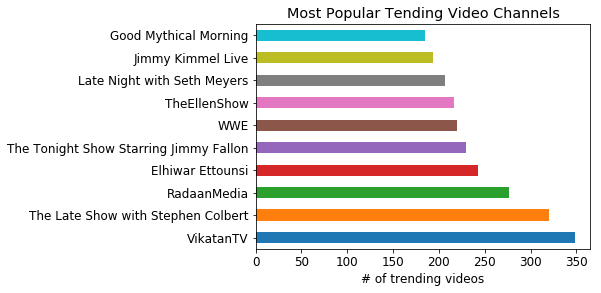

In [64]:
AllCountries_df = pd.concat(data_frames)
Top_Channels = AllCountries_df['channel_title'].value_counts().head(10)
Top_Channels.plot(kind='barh')
plt.xlabel('# of trending videos')
plt.title('Most Popular Tending Video Channels')

One would assume that trending videos have a large view count. Let's examine the top ten view counts of the trending videos across all countries. 

Text(0.5,1,'Most viewed trending videos')

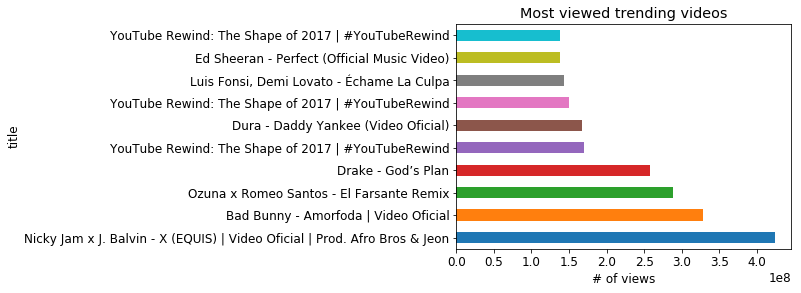

In [67]:
AllCountries_df['views'] = pd.to_numeric(AllCountries_df['views'], errors='coerce')
AllCountries_df = AllCountries_df.dropna(subset=['views'])
AllCountries_df.views.astype(int)
Top_viewed = AllCountries_df.sort_values(by='views', ascending=False).head(100)
Top_viewed.head(10).plot(x='title', y='views', kind='barh', legend=False)
plt.xlabel('# of views')
plt.title('Most viewed trending videos')

Observe that there is a large discrepancy for the number of view counts of the most viewed trending videos -- it's in the hundred millions. 

We will next observe the breakdown of the categories of the top 100 most viewed videos across all countries. 

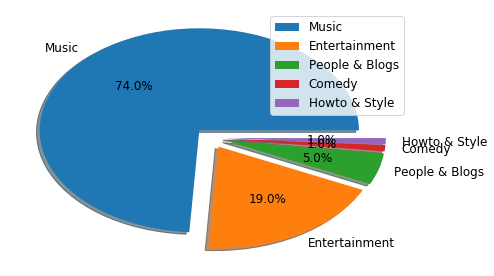

In [68]:
Top_viewed_cat = Top_viewed['category_name']
category_count = Top_viewed_cat.value_counts(normalize=True)
explode = list()
for k in category_count.index:
    explode.append(0.1)
pie = plt.pie(category_count,labels=category_count.index, explode=explode, shadow=True, autopct='%1.1f%%')
plt.legend(pie[0], category_count.index, loc='best')
plt.tight_layout()

One would expect that trending videos have a very high liked to disliked vote ratio. We can plot this difference on a bar graph for the top 10 most viewed videos. 

/home/josh/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


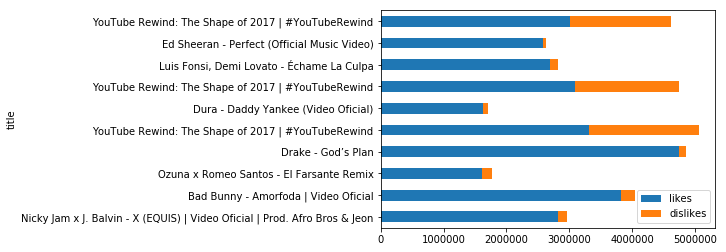

In [55]:
ax = Top_viewed.head(10).plot(x='title', y=['likes', 'dislikes'], stacked=True, kind='barh')

One observation to make here is that some videos have a lare number of dislikes and the ones that do have a large number of votes overall. It would appear that the number of votes is more important than the number of likes versus dislikes. 

# English Trending Data

Another important factor in what makes a video trend is the way it is described. We can observe the most popular words used in each description and tag line, exempting the common English words, in each prodominatly English speaking country. 

In [69]:
english_df = pd.concat([data_frames['CA'], data_frames['GB'], data_frames['US']])
english_df.head()

,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
video_id,,,,,,,,,,,,,
0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,News & Politics,2017-11-13 07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,► Follow for News! - https://twitter.com/KEEMS...
FyZMnhUtLfE,2017-11-14,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,1,Film & Animation,2017-11-12 16:00:01,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",158815,218,30,186,https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,Thanks for watching the drama! Help more peopl...
7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,Music,2017-11-11 16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
gifPYwArCVQ,2017-11-14,Fake Pet Smart Employee Prank!,NELK,23,Comedy,2017-11-13 01:30:01,"prank|""pranks""|""nelk""|""nelkfilmz""|""nelkfilms""",557883,44558,621,9619,https://i.ytimg.com/vi/gifPYwArCVQ/default.jpg,3 Days left to cop NELK merch: https://nelk.ca...
8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10 19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,I think Sarah Millican was very excited for th...


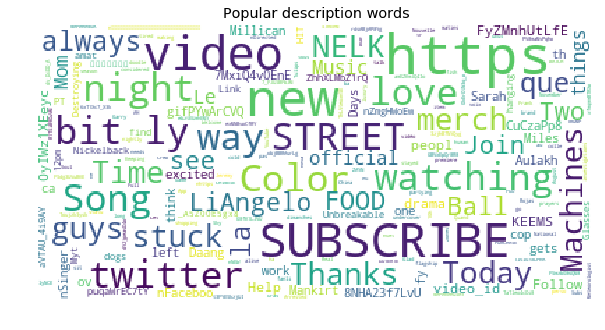

In [70]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(english_df['description']))

print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Popular description words')
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

Notice that a lot of trending videos have the youtube video_id of other videos. One conclusion we can draw from this is that youtube authors want to get viewers to watch other videos on their channel. More viewers and subscribers to a channel leads can possibly impact whether a video becomes trending. 

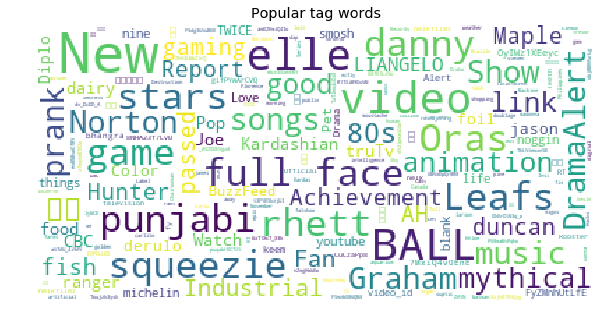

In [71]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(english_df['tags']))

print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular tag words')
plt.show()
fig.savefig("word2.png", dpi=900)

One thing that we notice with the most popular english tag words is that there are common descriptors (i.e. New, full, good) appearing a lot.